In [23]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pprint import pprint
from scipy.stats import linregress

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data_df = pd.read_csv(mouse_drug_data_to_load)
clinical_data_df = pd.read_csv(clinical_trial_data_to_load)
# mouse_data_df
clinical_data_df

# Combine the data into a single dataset
combined_data = pd.merge(clinical_data_df, mouse_data_df, on="Mouse ID")



# Display the data table for preview
combined_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [24]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor = combined_data['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
mean_tumor = combined_data.groupby(["Drug","Timepoint"]).mean()["Tumor Volume (mm3)"]
mean_tumor_df = pd.DataFrame(mean_tumor)
mean_tumor_df = mean_tumor_df.reset_index()
# Preview DataFrame
mean_tumor_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [25]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# mean_tumor = combined_data['Drug'].count()
# Convert to DataFrame
# mean_tumor = me
# Preview DataFrame

error_tumor = combined_data.groupby(["Drug","Timepoint"]).sem()["Tumor Volume (mm3)"]
error_tumor_df = pd.DataFrame(error_tumor)
error_tumor_df = error_tumor_df.reset_index()
# Preview DataFrame
error_tumor_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [26]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked
re_format = mean_tumor_df.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']
# re_format
re_format_error = error_tumor_df.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']
re_format_error
re_format.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


AttributeError: 'DataFrame' object has no attribute 'get_label'

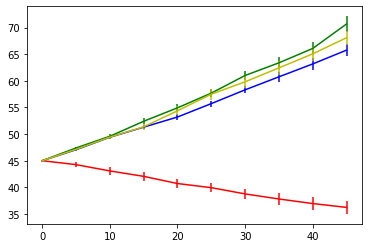

In [39]:
# Generate the Plot (with Error Bars)
plt.errorbar(re_format.index, re_format["Capomulin"],yerr=re_format_error["Capomulin"], color="r")
plt.errorbar(re_format.index, re_format["Infubinol"],yerr=re_format_error["Infubinol"], color="b")
plt.errorbar(re_format.index, re_format["Ketapril"],yerr=re_format_error["Ketapril"], color="g")
plt.errorbar(re_format.index, re_format["Placebo"],yerr=re_format_error["Placebo"], color="y")

plt.legend(handles=[reformat_count, re_format_error], loc="best")
plt.show()
# Save the Figure



In [28]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [29]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# mean_tumor
# Convert to DataFrame

# Preview DataFrame


# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor = combined_data['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
mean_tumor = combined_data.groupby(["Drug","Timepoint"]).mean()["Tumor Volume (mm3)"]
mean_tumor_df = pd.DataFrame(mean_tumor)

# Preview DataFrame
mean_tumor_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [30]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
error_tumor = combined_data.groupby(["Drug","Timepoint"]).sem()["Tumor Volume (mm3)"]
# Convert to DataFrame
error_tumor_df = pd.DataFrame(error_tumor)
# Preview DataFrame
error_tumor_df.head()






Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [31]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked
# re_format = mean_tumor_df.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']
# # re_format
# re_format_error = error_tumor_df.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']
re_format_error
re_format.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


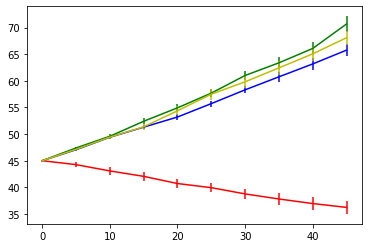

In [32]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure

plt.errorbar(re_format.index, re_format["Capomulin"],yerr=re_format_error["Capomulin"], color="r")
plt.errorbar(re_format.index, re_format["Infubinol"],yerr=re_format_error["Infubinol"], color="b")
plt.errorbar(re_format.index, re_format["Ketapril"],yerr=re_format_error["Ketapril"], color="g")
plt.errorbar(re_format.index, re_format["Placebo"],yerr=re_format_error["Placebo"], color="y")
# plt.errorbar(loc='best')
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [33]:
# # Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# count_tumor = combined_data['Tumor Volume (mm3)'].count()
# # Convert to DataFrame
# count_tumor = combined_data.groupby(["Drug","Timepoint"]).count()["Tumor Volume (mm3)"]
# count_tumor_df = pd.DataFrame(count_tumor)
# count_tumor_df = count_tumor_df.reset_index()
# # Preview DataFrame
# count_tumor_df.head()

# mouse_data_df

# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
count_tumor = combined_data['Mouse ID'].count()

# Convert to DataFrame
count_tumor = combined_data.groupby(["Drug","Timepoint"]).count()["Mouse ID"]
count_tumor_df = pd.DataFrame(count_tumor)
count_tumor_df = count_tumor_df.reset_index()
# Preview DataFrame
count_tumor_df.head()



,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [34]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked
reformat_count = count_tumor_df.pivot(index='Timepoint', columns='Drug')['Mouse ID']
reformat_count.head()
# reformat_error = error_tumor_df.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']
# re_format_error
# re_format.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


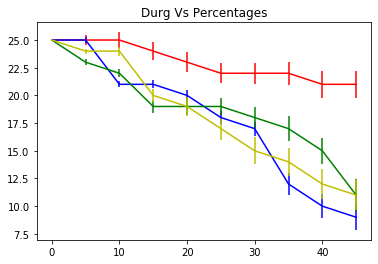

In [38]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure


# plt.errorbar(x, y + 3, yerr=yerr, label='Drug Timepoint')

plt.title ("Durg Vs Percentages")

plt.errorbar(reformat_count.index, reformat_count["Capomulin"],yerr=re_format_error["Capomulin"], color="r")
plt.errorbar(reformat_count.index, reformat_count["Infubinol"],yerr=re_format_error["Infubinol"], color="b")
plt.errorbar(reformat_count.index, reformat_count["Ketapril"],yerr=re_format_error["Ketapril"], color="g")
plt.errorbar(reformat_count.index, reformat_count["Placebo"],yerr=re_format_error["Placebo"], color="y")




# plt.legend(handles=[reformat_count, re_format_error], loc="best")


plt.show()









![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm
tumor_mean_perc = 100 * (reformat_count.iloc[-1] - reformat_count.iloc[0])/reformat_count.iloc[0]
tumor_sem_perc = 100 * (re_format.iloc[-1] - re_format.iloc[0])/re_format.iloc[0]
tumor_sem_perc

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)